##  Chicago Taxi Market Analysis: Passenger Behavior & Weather Impact
**Author:** Fiorella Trigo  
**Field:** Data Science / Business Intelligence  

---

## 1. Project Overview
This project investigates the taxi industry in Chicago. The objective is to identify patterns in passenger preferences and analyze how external factors, specifically weather conditions, influence trip duration. 

### Key Objectives:
* Identify the most popular taxi companies in the market.
* Determine the top neighborhoods where trips terminate.
* Test a statistical hypothesis regarding the impact of weather on trip duration on Saturdays.

### Data Sources & Tools:
* **SQL:** Data extraction from a relational database containing information on taxi trips, weather records, and neighborhoods.
* **Python:** Data cleaning, Exploratory Data Analysis (EDA), and Statistical Testing.
* **Libraries:** `pandas`, `numpy`, `seaborn`, `matplotlib`, `scipy.stats`.

In [1]:
# 1. Data Manipulation
import pandas as pd
import numpy as np

# 2. Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Statistical Analysis
from scipy import stats as st

# Setup: Using a cleaner style for plots
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Loading datasets
try:
    df_taxis = pd.read_csv('./datasets/project_sql_result_01.csv')
    df_neighborhoods = pd.read_csv('./datasets/project_sql_result_04.csv')
    df_trips = pd.read_csv('./datasets/project_sql_result_07.csv')
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Error: Datasets not found. Check the file paths.")

# Quick look at the main structure
display(df_taxis.head())
display(df_taxis.info())
display(df_neighborhoods.head())
display(df_neighborhoods.info())
display(df_trips.head())
display(df_trips.info())

Datasets loaded successfully!


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

### Análisis Exploratorio de Datos

In [39]:
# Verificamos tipos de datos y obtenemos un resumen
print('Información del dataset de taxis:')
print(df_taxis.info())

print('\nInformación del dataset de barrios:')
print(df_neighborhoods.info())

Información del dataset de taxis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Información del dataset de barrios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


Ambos dataframes están completos y los tipos de datos que contienen son los correctos.

In [40]:
# Identificamos los 10 principales barrios en términos de finalización de viajes
df_top10 = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print('Top 10 barrios por promedio de viajes:')
print(df_top10)

Top 10 barrios por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


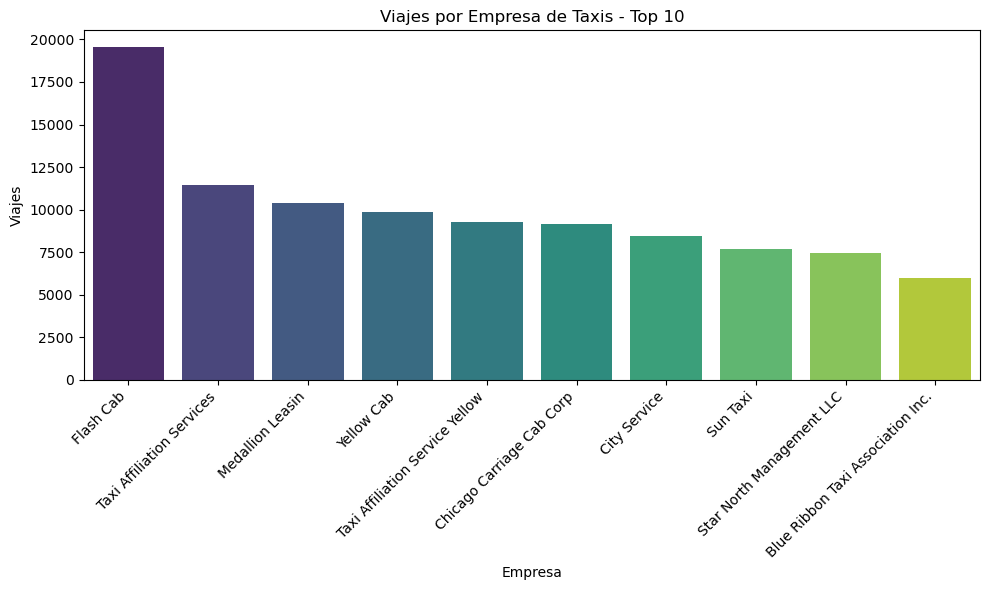

In [41]:
# Gráfico 1: Empresas de taxis y número de viajes
top_10_companies = df_taxis.sort_values('trips_amount', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_companies,
    x='company_name',
    y='trips_amount',
    palette='viridis',
    hue='company_name'
)

plt.xticks(rotation=45, ha='right')
plt.title('Viajes por Empresa de Taxis - Top 10')
plt.xlabel('Empresa')
plt.ylabel('Viajes')
plt.tight_layout()
plt.show()

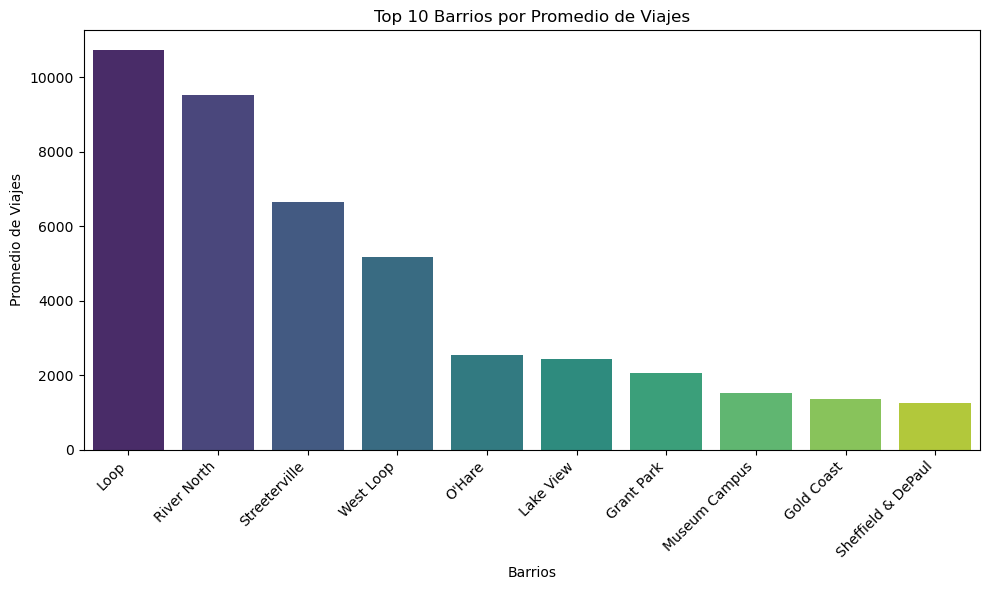

In [42]:
# Gráfico 2: Top 10 barrios y número de viajes
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_top10,
    x='dropoff_location_name',
    y='average_trips',
    hue='dropoff_location_name',
    palette='viridis'
)

plt.title('Top 10 Barrios por Promedio de Viajes')
plt.xlabel('Barrios')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### **Insights principales del análisis**

1. **Concentración del mercado en empresas de taxis**

**Flash Cab** destaca claramente como **líder**, con un número de viajes muy superior al resto. Las empresas que siguen en el ranking presentan valores similares entre sí, lo que sugiere un mercado donde solo la empresa líder posee una ventaja competitiva marcada, mientras que el resto compite en condiciones relativamente equivalentes.

2. **Distribución desigual de la demanda por barrios**

La **mayor parte de la demanda** se concentra en un **número reducido de zonas**. **Loop, River North y Streeterville** registran los promedios de viajes más altos, evidenciando que son los principales **polos de actividad urbana**. A partir del quinto puesto, el promedio de viajes disminuye de manera significativa.

3. **Implicancias operativas**

Estos resultados permiten **identificar** con claridad dónde se generan los **mayores volúmenes de actividad**, lo cual es útil para **decisiones** relacionadas con **asignación de recursos, optimización de rutas, servicios priorizados o estrategias comerciales**.

### **Pruebas de Hipótesis**

*"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".*

In [43]:
# Verificamos tipos de datos
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [44]:
# Convertimos start_ts a tipo datetime para nuestro análisis
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])

In [48]:
# Filtramos registros que correspondan a sábados
df_trips['day_of_week'] = df_trips['start_ts'].dt.day_name()
df_saturdays = df_trips[df_trips['day_of_week'] == 'Saturday']

# Separamos los grupos de sábados: lluviosos vs. no lluviosos
group_rainy = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']
group_clear = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']

print('Número de sábados lluviosos:', len(group_rainy))
print('Número de sábados claros:', len(group_clear))

Número de sábados lluviosos: 180
Número de sábados claros: 888


In [49]:
# Prueba de Levene para homogeneidad de varianzas
levene_stat, levene_p = st.levene(group_rainy, group_clear)
print("\nResultados de la prueba de Levene:")
print("Estadístico:", levene_stat)
print("Valor p:", levene_p)


Resultados de la prueba de Levene:
Estadístico: 0.38853489683656073
Valor p: 0.5332038671974493


In [50]:
# Determinar si asumir varianzas iguales o no
equal_var_flag = True if levene_p > 0.05 else False

if equal_var_flag:
    print("\nLas varianzas pueden considerarse iguales (p > 0.05). Se usa equal_var=True.")
else:
    print("\nLas varianzas NO son iguales (p < 0.05). Se usa equal_var=False.")


Las varianzas pueden considerarse iguales (p > 0.05). Se usa equal_var=True.


In [51]:
# Prueba t de muestras independientes
t_stat, p_value = st.ttest_ind(group_rainy, group_clear, equal_var=True)

print('\nResultados de la prueba t:')
print('Estadístico t:', t_stat)
print('Valor p:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Se rechaza la hipótesis nula. Existe diferencia en la duración promedio de los viajes según las condiciones climáticas de los sábados.')
else:
    print('No se rechaza la hipótesis nula. No se encuentra diferencia significativa en la duración promedio de los viajes los sábados.')


Resultados de la prueba t:
Estadístico t: 6.946177714041499
Valor p: 6.517970327099473e-12
Se rechaza la hipótesis nula. Existe diferencia en la duración promedio de los viajes según las condiciones climáticas de los sábados.


### **Planteo de hipótesis**

Para comparar si la duración promedio de los viajes difiere entre sábados con buen clima y sábados con mal clima, planteé:

- Hipótesis nula (H₀): *las duraciones promedio de ambos grupos son iguales.*

- Hipótesis alternativa (H₁): *las duraciones promedio son distintas según las condiciones climáticas.*

### **Criterio para probar las hipótesis**

Primero verifiqué si las **varianzas** de ambos grupos podían considerarse **iguales** utilizando la **prueba de Levene**, ya que el t-test requiere conocer este supuesto.

Luego apliqué una **prueba t de dos muestras independientes**, comparando el **p-value** con un **nivel de significancia** de 0.05 para decidir si rechazar o no la hipótesis nula.